# Exporing the data

Here I am going to explore the address data. I won't do any machine learning here, but I will do some analysis of the statistics of the digits.

In [1]:
import numpy as np
import scipy as sp
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#plt.rc("text", usetex=True)
plt.rc("font", size=18, family="serif")

In [3]:
input_path = "../data/"

In [4]:
#Load the training data and pull it apart into
training_dataset = loadmat(input_path + "train_32x32.mat")
train_X = training_dataset['X']
train_y = np.squeeze(training_dataset['y'])
#Do the same for the test sets
testing_dataset = loadmat(input_path + "test_32x32.mat")
test_X = testing_dataset['X']
test_y = np.squeeze(testing_dataset['y'])
#Make dataframes and summarize
print("Training shapes: ", train_X.shape, train_y.shape)
print("Testing shapes:  ", test_X.shape, test_y.shape)

Training shapes:  (32, 32, 3, 73257) (73257,)
Testing shapes:   (32, 32, 3, 26032) (26032,)


In [5]:
train_X = np.moveaxis(train_X, -1, 0)
test_X = np.moveaxis(test_X, -1, 0)
print("Training shapes: ", train_X.shape, train_y.shape)
print("Testing shapes:  ", test_X.shape, test_y.shape)

Training shapes:  (73257, 32, 32, 3) (73257,)
Testing shapes:   (26032, 32, 32, 3) (26032,)


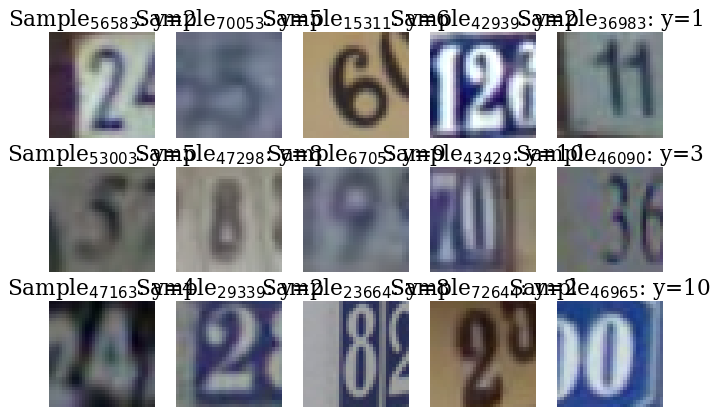

In [6]:
#Visualize some pictures
rows = 3
columns = 5
fig, ax = plt.subplots(rows, columns, figsize=(11, 7))
for i, c in enumerate(np.random.choice(len(train_X), rows * columns)):
    ax[i%rows, i//rows].imshow(train_X[c,:,:,:])
    ax[i%rows, i//rows].axis("off")
    ax[i%rows, i//rows].set_title(r"Sample$_{%d}$: y=%d"%(c, train_y[c]))

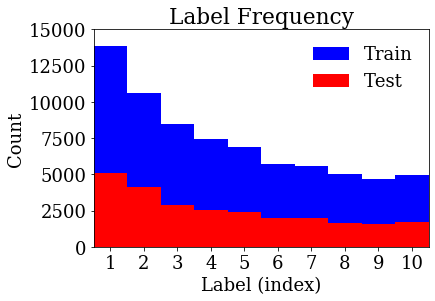

In [7]:
#Histogram the targets
n, bins, patches = plt.hist(train_y, bins=range(1,12), align='left', color="b", label="Train")
n, bins, patches = plt.hist(test_y, bins=range(1,12), align='left', color="r", alpha=1, label="Test")
plt.axis([0,11,0,15000])
plt.title("Label Frequency")
plt.ylabel("Count")
plt.xlabel("Label (index)")
plt.xticks(np.arange(1, 11))
plt.xlim(.5, 10.5)
plt.legend(frameon=False)